# Problema

Predecir el coste del seguro

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [166]:
# imports
import pandas as pd

In [167]:
ruta = "insurance.csv"
data = pd.read_csv(ruta)

In [168]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos (lipieza, nans, escalado...)

* Valorar diferentes modelos de regresión (linear regressor, polynomial, ridge, lasso, elastic, decission tree y random forest)

* Comparación entre modelos (dividir el dataset en train y test, entrenar con el train y evaluar con el test)

* Métricas (todas, y que aporta cada una)

* Conclusiones finales

## Limpieza del dataset y preparación de los datos

### Visualización

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [171]:
data.duplicated().sum()
data[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [172]:
data.drop_duplicates(inplace=True)  # Elimina duplicados y devuelve un DataFrame limpio


<Axes: ylabel='age'>

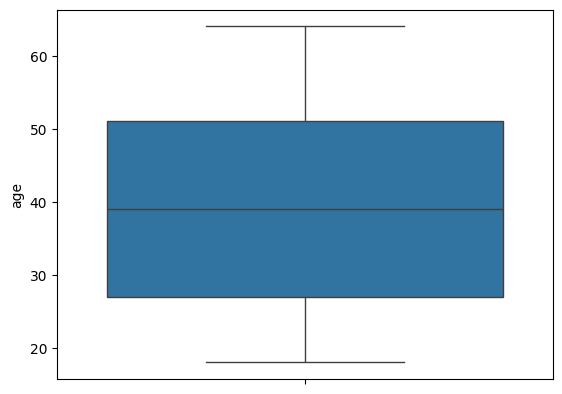

In [173]:
sns.boxplot(data['age'])

<Axes: xlabel='count', ylabel='sex'>

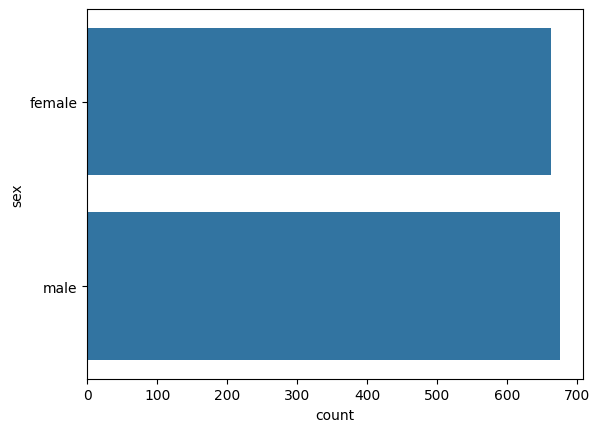

In [174]:
sns.countplot(data["sex"])

<Axes: xlabel='bmi', ylabel='Count'>

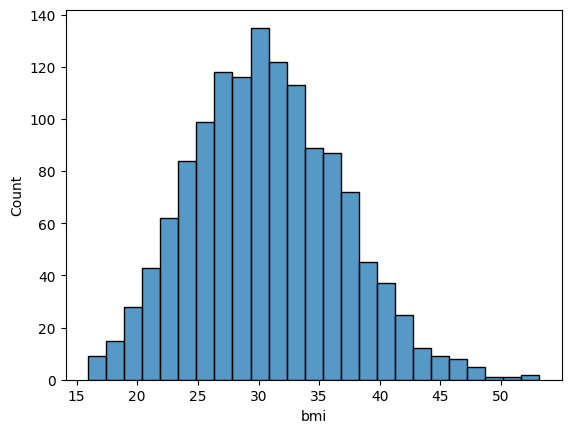

In [175]:
sns.histplot(data["bmi"])

<Axes: xlabel='count', ylabel='smoker'>

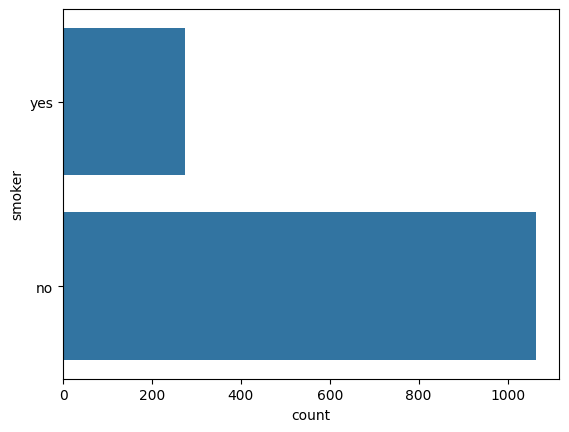

In [176]:
sns.countplot(data['smoker'])

<Axes: xlabel='count', ylabel='region'>

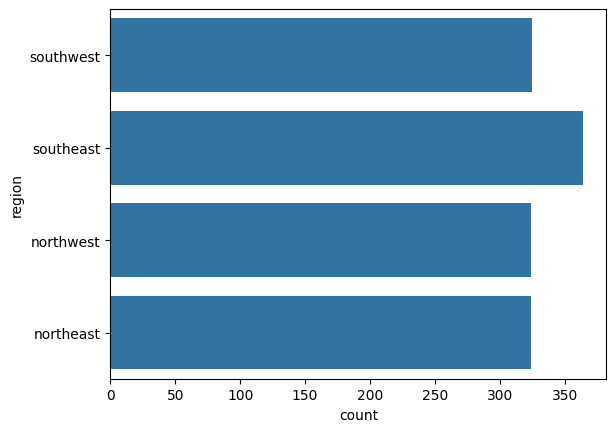

In [177]:
sns.countplot(data["region"])

<Axes: xlabel='children', ylabel='Count'>

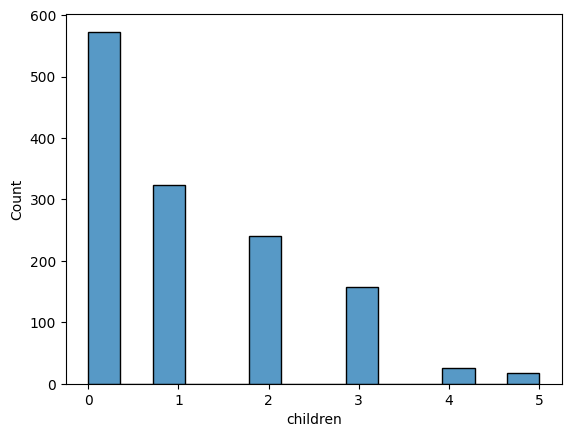

In [178]:
sns.histplot(data['children'])

<Axes: xlabel='charges', ylabel='Count'>

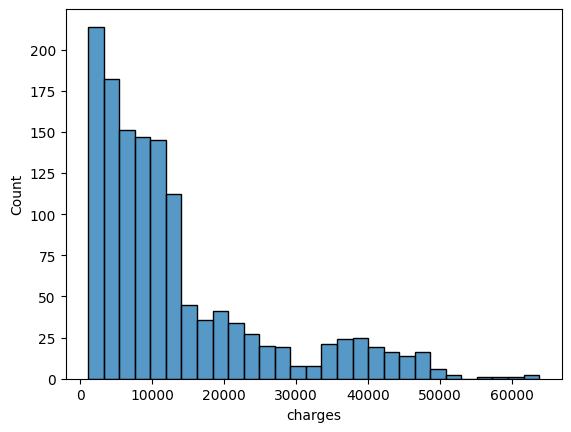

In [179]:
sns.histplot(data['charges'])

### Preparación del dataset para el modelaje

In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [181]:
map_sex = {
    "female": 0,
    'male': 1
}
data["sex"] = data["sex"].map(map_sex)

In [182]:
map_yes_no = {
    "yes": 0,
    'no': 1
}
data["smoker"] = data["smoker"].map(map_yes_no)

In [183]:
dummies_region = pd.get_dummies(data['region'], dtype= float)
data.drop('region', inplace= True, axis=1)
data = pd.concat([data, dummies_region], axis=1)

In [184]:
data

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,0,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,1,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,1,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,1,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,1,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,1,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,1,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,1,2007.94500,0.0,0.0,0.0,1.0


In [185]:
x = data.drop("charges", axis=1)
y = data["charges"]

In [186]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaler.fit_transform(x_scaled), columns=x.columns)

In [187]:
x_scaled

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,-1.440418,-1.009771,-0.453160,-0.909234,-1.969660,-0.565546,-0.565546,-0.611638,1.764609
1,-1.511647,0.990324,0.509422,-0.079442,0.507702,-0.565546,-0.565546,1.634955,-0.566698
2,-0.799350,0.990324,0.383155,1.580143,0.507702,-0.565546,-0.565546,1.634955,-0.566698
3,-0.443201,0.990324,-1.305052,-0.909234,0.507702,-0.565546,1.768203,-0.611638,-0.566698
4,-0.514431,0.990324,-0.292456,-0.909234,0.507702,-0.565546,1.768203,-0.611638,-0.566698
...,...,...,...,...,...,...,...,...,...
1332,0.767704,0.990324,0.050269,1.580143,0.507702,-0.565546,1.768203,-0.611638,-0.566698
1333,-1.511647,-1.009771,0.206053,-0.909234,0.507702,1.768203,-0.565546,-0.611638,-0.566698
1334,-1.511647,-1.009771,1.014490,-0.909234,0.507702,-0.565546,-0.565546,1.634955,-0.566698
1335,-1.297958,-1.009771,-0.797524,-0.909234,0.507702,-0.565546,-0.565546,-0.611638,1.764609


In [188]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=0.7)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

In [200]:
print('X train: ', x_train.shape)
print('Y train: ', y_train.shape)
print('X test: ', x_test.shape)
print('Y test: ',y_test.shape)
print('X val: ', x_val.shape)
print('Y val: ', y_val.shape)

X train:  (935, 9)
Y train:  (935,)
X test:  (201, 9)
Y test:  (201,)
X val:  (201, 9)
Y val:  (201,)


## Modelaje

In [193]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Definir los modelos de regresión a probar
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "SVR": SVR()
}

# Diccionario para almacenar resultados
results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(x_train, y_train)  # Entrenar el modelo
    y_pred = model.predict(x_val)  # Predecir en validación
    
    # Calcular métricas
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)  # Raíz del MSE
    mae = mean_absolute_error(y_val, y_pred)
    medae = median_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100  # MAPE en %

    # Guardar métricas en el diccionario
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "MedAE": medae, "R²": r2, "MAPE": mape}

# 🔹 Convertir resultados en DataFrame y mostrar
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="MSE"))


                            MSE          RMSE          MAE        MedAE  \
Gradient Boosting  2.444024e+07   4943.706779  2765.523036  1359.250363   
Random Forest      2.629699e+07   5128.059427  2818.145930   952.600712   
Linear Regression  3.529983e+07   5941.365628  4038.560007  2260.782010   
Lasso Regression   3.530017e+07   5941.394495  4038.529857  2261.063916   
Ridge Regression   3.531624e+07   5942.746557  4040.102902  2272.669923   
Decision Tree      4.171736e+07   6458.897605  3034.842056   530.438200   
SVR                1.720789e+08  13117.883522  8595.131670  4997.954556   

                         R²        MAPE  
Gradient Boosting  0.844389   30.018999  
Random Forest      0.832567   31.340148  
Linear Regression  0.775246   39.743519  
Lasso Regression   0.775244   39.742244  
Ridge Regression   0.775142   39.743465  
Decision Tree      0.734386   26.731571  
SVR               -0.095626  102.661881  


### 📊 **Métricas de Evaluación en Regresión**

Cuando evaluamos un modelo de regresión, es importante usar diferentes métricas para entender cómo se comporta el modelo en comparación con los datos reales. A continuación, explicamos el significado de las principales métricas utilizadas en regresión:

1. **MSE (Error Cuadrático Medio)**  
   El **MSE** mide la **media de los errores cuadrados** entre las predicciones y los valores reales. Cuanto **más bajo** sea este valor, mejor es el modelo. Penaliza fuertemente los errores grandes.  
   - Fórmula:  
   $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$
   - Un valor más bajo indica una mejor capacidad de predicción.

2. **RMSE (Raíz del Error Cuadrático Medio)**  
   El **RMSE** es la **raíz cuadrada** del MSE. Esto nos da una métrica en las mismas unidades que las variables de entrada, lo que lo hace más interpretativo que el MSE.  
   - Fórmula:  
   $$ RMSE = \sqrt{MSE} $$
   - Como el MSE, un valor más bajo indica un mejor modelo.

3. **MAE (Error Absoluto Medio)**  
   El **MAE** calcula el promedio de los **errores absolutos**. Es una métrica más robusta a los outliers, ya que no penaliza tan fuertemente los errores grandes como el MSE.  
   - Fórmula:  
   $$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}| $$
   - Un valor más bajo de MAE indica menor error promedio.

4. **MedAE (Error Absoluto Mediano)**  
   El **MedAE** es similar al **MAE**, pero en lugar de usar la media, usa la **mediana** de los errores absolutos. Esta métrica es **más robusta** a los valores atípicos o outliers.  
   - Un valor bajo de MedAE indica un buen desempeño general sin ser afectado por outliers.

5. **R² (Coeficiente de Determinación)**  
   **R²** indica qué tan bien el modelo explica la variabilidad de la variable dependiente. Un valor de **1** indica que el modelo explica completamente los datos, mientras que un valor de **0** indica que el modelo no tiene capacidad de predicción.  
   - Fórmula:  
   $$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$
   - Un valor más alto (cerca de 1) es preferible.

6. **MAPE (Error Porcentual Absoluto Medio)**  
   **MAPE** mide el error en términos de porcentaje. Es útil cuando los datos tienen diferentes escalas y nos interesa el error relativo.  
   - Fórmula:  
   $$ MAPE = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{y_i - \hat{y_i}}{y_i}\right| \times 100 $$
   - Un valor bajo de MAPE indica que el modelo está realizando predicciones cercanas a los valores reales en términos relativos.

---

### 📈 **¿Cómo interpretar estas métricas?**
- **MSE y RMSE** nos indican qué tan lejos están las predicciones de los valores reales, con **RMSE** siendo más fácil de interpretar.  
- **MAE** da una estimación del error promedio, útil cuando se quiere una métrica más simple y robusta.  
- **R²** nos dice cuánta varianza de los datos es explicada por el modelo, con valores cercanos a 1 indicando un buen ajuste.  
- **MAPE** es útil cuando necesitamos medir el rendimiento relativo de las predicciones, especialmente en problemas con datos de diferentes escalas.  

Cada métrica tiene sus ventajas y desventajas, por lo que es importante considerar varias al evaluar el rendimiento de un modelo.


Parece que el gradient boosting tiene las mejores puntuaciones.

In [194]:
print(results_df.loc['Gradient Boosting'])

MSE      2.444024e+07
RMSE     4.943707e+03
MAE      2.765523e+03
MedAE    1.359250e+03
R²       8.443890e-01
MAPE     3.001900e+01
Name: Gradient Boosting, dtype: float64


In [195]:
from sklearn.model_selection import RandomizedSearchCV

In [196]:
# Definir el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor()

# Definir el rango de parámetros para RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  # Número de árboles (100, 200, ..., 1000)
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Tasa de aprendizaje
    'max_depth': np.arange(3, 15, 1),  # Profundidad máxima de cada árbol
    'subsample': [0.8, 0.9, 1.0],  # Proporción de muestras
    'min_samples_split': np.arange(2, 6),  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': np.arange(1, 6)  # Mínimo de muestras para ser hoja
}


In [197]:
# Concatenar x_train y x_val para formar el conjunto de datos de entrenamiento
x_train_concat = pd.concat([x_train, x_val], axis=0)  # Concatenamos a lo largo de las filas (axis=0)

# Concatenar y_train y y_test para formar el conjunto de etiquetas de entrenamiento
y_train_concat = pd.concat([y_train, y_val], axis=0)  # Concatenamos a lo largo de las filas (axis=0)


In [198]:
from sklearn.model_selection import RandomizedSearchCV

# Realizar el RandomizedSearchCV con scoring='accuracy'
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, 
                                   n_iter=50, cv=5, n_jobs=-1, scoring='r2', verbose=1, random_state=42)

# Ajustar RandomizedSearchCV con el conjunto de entrenamiento
random_search.fit(x_train_concat, y_train_concat)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5]),
                                        'min_samples_split': array([2, 3, 4, 5]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [199]:
# Mejor combinación de parámetros
print("Best parameters found: ", random_search.best_params_)

# Mejor puntaje de validación cruzada (negativo MSE)
print("Best score (r2): ", random_search.best_score_)

print('*'*20)

# Predecir con los mejores parámetros en el conjunto de prueba
y_pred = random_search.best_estimator_.predict(x_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Calcular MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar las métricas
print(f"Mean Squared Error on Test Set (MSE): {mse}")
print(f"Root Mean Squared Error on Test Set (RMSE): {rmse_test}")
print(f"Mean Absolute Error on Test Set (MAE): {mae_test}")
print(f"R² on Test Set: {r2_test}")
print(f"Mean Absolute Percentage Error on Test Set (MAPE): {mape_test}%")

Best parameters found:  {'subsample': 0.8, 'n_estimators': np.int64(400), 'min_samples_split': np.int64(4), 'min_samples_leaf': np.int64(2), 'max_depth': np.int64(3), 'learning_rate': 0.01}
Best score (r2):  0.8563397126474133
********************
Mean Squared Error on Test Set (MSE): 20666351.934631776
Root Mean Squared Error on Test Set (RMSE): 4546.0259496214685
Mean Absolute Error on Test Set (MAE): 2407.480795494296
R² on Test Set: 0.8804648896963062
Mean Absolute Percentage Error on Test Set (MAPE): 30.925271909826336%


# Conclusiones

En este proyecto, nos propusimos predecir los precios de seguros utilizando un conjunto de datos con características como edad, sexo, índice de masa corporal (BMI), número de hijos, si fuma o no, y la región. Para ello, realizamos un proceso de preprocesamiento de datos, que incluyó la codificación de variables categóricas y la normalización de las características.

A continuación, probamos varios modelos de regresión, como **Regresión Lineal, Ridge, Lasso, Árboles de Decisión, Random Forest, Gradient Boosting y SVR**. Tras evaluar su rendimiento, utilizamos un **RandomizedSearchCV** para ajustar los parámetros del modelo de **GradientBoostingRegressor**, que fue el que mostró el mejor rendimiento.

Los resultados obtenidos son los siguientes:
- **Mejores parámetros** encontrados: {'subsample': 0.8, 'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.01}.
- **R² en conjunto de entrenamiento**: 0.85, indicando que el modelo ajusta bien los datos de entrenamiento.
- **R² en conjunto de prueba**: 0.88, lo que muestra una **buena capacidad de generalización**.
- **MSE**: 20.666.351,93 € , lo que señala que hay espacio para mejorar la precisión, pero los errores son manejables.
- **MAPE**: 32.19%, lo que sugiere que, aunque el modelo es robusto, hay una cierta variabilidad en las predicciones.

Hemos logrado desarrollar un modelo de **predicción de precios de seguros** eficiente y con un buen rendimiento tanto en los datos de entrenamiento como en los de prueba, usando técnicas avanzadas de optimización de modelos para obtener la mejor configuración de parámetros.